# Исследование рынка компьютерных игр

В данном исследовании мы будем анализировать данные о продажах игр, информацию об оценках пользователей и экспертов, жанрах и платформах до 2016 г. 

Сейчас декабрь 2016 г., и нам необходимо спланировать кампанию на 2017 г. для интернет-магазина "Стримчик", который продает компьютерные игры по всему миру. 

Цель исследования - выявить определающие успешность игр закономерности для планирования рекламных кампаний на 2017 г.

Для этого необходимо выполнить следующие шаги:
* определить динамику продаж игр по платформам 
* выделить наиболее перспективные платформы 
* изучить влияние оценок пользователей и критиков на продажи игр
* исследовать распределение игр по жанрам 
* выделить самые прибыльные жанры
* составить портрет пользователей по регионам (NA, EU, JP)

**Навигация**:

1. [Изучение общей информации о данных ](#1)
2. [Предварительная обработка данных](#2)
3. [Проведение исследовательского анализа данных](#3)
4. [Составление портрета пользователей по регионам](#4)
5. [Общий вывод](#6)

## 1. Изучение общей информации о данных  <a id="1"></a>

### 1.1. Импорт библиотек и получение данных

В первую очередь импортируем необходимые в работе библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import stats as st
import numpy as np

Прочитаем файл с данными

In [2]:
df = pd.read_csv('games.csv')

### 1.2. Проверка корректности типов данных 

Рассмотрим общую информацию о данных с помощью методов head, info, также вычислим общее количество наблюдений в датасете и количество пропусков по каждому столбцу.

In [3]:
print('Количество наблюдений в датасете: {:,}'.format(len(df)))

Количество наблюдений в датасете: 16,715


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В нашем датафреме содержатся 11 столбцов со следующими данными:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB.Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Рассмотрим также **типы данных** по столбцам. 
* Столбцы **'Name', 'Platform', 'Genre', 'Rating'** хранят **строковые значения**. Тип данных корректен. 
* В столбце **'User_score'** также хранятся **строковые значения**. В дальнейшем заменим их на вещественный тип данных. 
* В столбцах с даннымы о продажах - **NA_sales, EU_sales, JP_sales, Other_sales** - хранится **вещественный тип данных**. Значения в этих столбцах выражены в млн. копий, соответственно знаки после запятой обозначают сотни тысяч проданных копий, поэтому округлять значения и менять тип данных на целочисленный некорректно. Оставим в данных столбцах текущий тип данных.
* В столбцах **'Year_of_Release', 'Critic_Score'** также хранится **вещественный тип данных**. Заменим данные в столбце 'Yesr_of_Release' на целочисленный тип. Также проверим, какие именно значения могут применять оценки в столбце 'Critic_Score', и, если дробная часть во всех наблюдениях равна нулю, также заменим тип данных на целочисленный.

### 1.3. Изучение количества пропусков

Изучив общую информацию по датафрейму, мы видим, что в столбцах с данными о названии игры, годом выпуска, жанром, оценкой критиков и пользователей, а также рейтингом от ESRB есть пропуски. Рассмотрим количество пропусков в каждом из столбцов:

In [6]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Мы видим, что больше всего пропусков в данных об оценках критиков, оценках пользователей и рейтинге ESRB.

### Вывод

Изучив общую информацию по датафрейму, мы выяснили, что данные требуют дальнейшей обработки: замены данных в некоторых столбцах, изучения пропущенных значений. Больше всего пропусков наблюдается в столбцах с рейтингом ESBR и оценками пользователей и критиков, в дальнейшем нам предстоит изучить, в связи с чем могли возникнуть данные пропуски и решить, можем ли мы их заполнить.

## 2. Предварительная обработка данных <a id="2"></a>

### 2.1. Изменение названий столбцов

В первую очередь приведем названия столбцов к нижнему регистру для удобства чтения их названий.

In [7]:
df.columns = df.columns.str.lower()

Также переименуем столбец 'rating' в 'esrb_age_rating', чтобы интуитивно было понятно, какие данные хранятся в этом столбце.

In [8]:
df = df.rename(columns={df.columns[-1]: 'esrb_age_rating'})

Посмотрим, каким образом теперь выглядят столбцы в нашем датафрейме:

In [9]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score',
       'esrb_age_rating'],
      dtype='object')

Мы удостоверились, что изменение названий столбцов произошло успешно.

### 2.2. Изучение пропусков

Ранее мы выяснили, что столбцах с данными о названии игры, годом выпуска, жанром, оценкой критиков и пользователей, а также рейтингом от ESRB есть пропуски. 

Однако в столбцах с **названием и жанром** таких пропусков всего два. Посмотрим, в каких играх не указано название жанра.

In [10]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_age_rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Мы видим, что 2 игры, у которых нет названия, и 2 игры, у которых не указан жанр, это одинаковые игры. У них также отсуствует информация об оценках критиков, пользователей, рейтинг по возрасту, а суммы продаж минимальны. По этим наблюдениям нельзя идентифицировать конкретные игры, поэтому мы можем исключить эти две записи.

In [11]:
df.dropna(subset=['name', 'genre'], inplace=True)

Далее изучим пропуски в столбце с **годом релиза игры**.

In [12]:
df[df['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_age_rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Мы видим, что в некоторых играх, у которых не указан год выпуска, есть какой-то год в самом названии. Возможно, мы могли бы извлечь год из названия таких игр и таким образом заполнить хотя бы часть пропусков. 

Извлечем последний элемент из названия игры (предположительно год выпуска) и сравним его с годом выпуска у тех игр, у которых он указан. Для сравнения выберем 2016 г.

In [13]:
df['year_splitted'] = df['name'].apply(lambda x: str(x).split()[-1])
df.loc[df['year_splitted'] == '2016'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_age_rating,year_splitted
2179,Just Dance 2016,Wii,2015.0,Misc,0.41,0.46,0.00,0.08,NaN,tbd,E10+,2016
2600,Pro Evolution Soccer 2016,PS4,2015.0,Sports,0.13,0.42,0.13,0.10,87.0,7.1,E,2016
3537,Just Dance 2016,WiiU,2015.0,Misc,0.27,0.25,0.00,0.05,73.0,6.9,E10+,2016
4836,Pro Evolution Soccer 2016,PS3,2015.0,Sports,0.09,0.12,0.15,0.04,NaN,7.2,E,2016
5215,Just Dance 2016,PS4,2015.0,Misc,0.17,0.13,0.00,0.06,73.0,6.8,E10+,2016


Мы видим, что не во всех играх год, указанный в названии, совпадает с годом релиза на определенной платформе. Изучив дополнительную информацию в интернете, мы выяснили, что спортивные симуляторы, в число которых например входит UEFA, Just Dance, как правило, выходят на год раньше, чем обозначено в названии. Поэтому год в названии игры не совпадает с реальным годом релиза.

Тем не менее, хотелось бы привести тип данных в столбце с годами к целочисленному типу, а мы не можем это сделать, если в столбце есть пропущенные значения.

Так как доля пропущенных значений по годам не такая большая (269 / 16 715, то есть ~1,6%), кроме того, в дальнейшем мы будем анализировать только актуальный времеменной период, поэтому нам понадобятся только наблюдения с известными годами, исключим наблюдения с пропущенными значениями по параметру "год выпуска".

In [14]:
df.dropna(subset=['year_of_release'], inplace=True)

Также удалим столбец 'year_splitted', т.к. в дальнешейм он нам не понадобится.

In [15]:
df = df.drop('year_splitted', axis=1)

Проверим, что пропущенные значения в информации о годах были заменены, а строки с пропущенными названиями и жанрами игр удалены.

In [16]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
esrb_age_rating    6676
dtype: int64

Теперь нам предстоит изучить пропуски в данных с **оценками критиков и пользователей и рейтингом по возрасту**.

Рассмотрим, какие значения встречаются среди **оценок критиков**.

In [17]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Мы видим, что все встречающиеся значения не имеют дробной части, поэтому мы могли бы заменить их на целочисленный тип данных, но нам мешает наличие пропусков. 

Здесь замена пропусков на нули будет некорректной, потому что может в дальнейшем повлиять на выводы о зависимостях, диаграммы. Исключить нули в дальнейшем мы не сможем, т.к. есть игры у которых оценка критиков действительно ноль. Предположить, какой мог быть рейтинг у игры мы тоже не можем, т.к. оценка это субъективная характеристика. Вероятно, пропущены значения у тех игр, которые критики просто не оценивали. Чтобы привести столбец к целочисленному типу, заменим пропущенные значения на определенный маркер, который в дальнейшем мы просто исключим из рассчетов. Маркером будет число 999 (таких реальных оценок не может быть, т.к. они вариируются от 0 до 100)

In [18]:
df['critic_score'] = df['critic_score'].fillna(999)

Рассмотрим уникальные значения и по **оценкам пользователей**.

In [19]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В списке оценок пользователей кроме пропущенных значений из необычных явлений встречается текстовое значение 'tbd' (to be determined - будет определено позднее), из-за которого тип данных в этом столбце является строковым. Изучим, у каких игр в качестве оценки указано 'tbd'

In [20]:
df.query('user_score == "tbd"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_age_rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,999.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,999.0,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,999.0,tbd,E


In [21]:
len(df.query('user_score == "tbd"'))

2376

Наблюдений, в которых рейтинг пользователей будет определен позднее, больше 2000. На первый взгляд кажется, что наличие tbd в столбце оценок может быть связано с нулевыми продажами в Японии, так как там, где указаны нули в столбце jp_sales есть tbd в user_score. Проверим, действительно ли данные условия совпадают.

In [22]:
len(df.query('user_score == "tbd"')) == len(df.query('user_score == "tbd" and jp_sales == 0'))

False

Количество строк при одновременнов выполнении двух условий - продажи в Японии нулевые и в оценке пользователя указано tbd - не равно количеству наблюдений с tbd в качестве оценки. Поэтому мы не можем говорить, что наличие tbd в качестве оценки связано с продажами в Японии. 

Возможно, это игры по которым пока слишком мало оценок, поэтому окончательная оценка пользователей будет определена позднее.

Как и в случае с оценками критиков мы не можем предугадать, какие значения могут быть в оценках пользователей, будь они пропущены или пока еще неопределены. В то же время нам необходимо заменить тип данных на вещественный для дальнейших рассчетов. Поэтому заменим tbd и пропуски в столбце с оценками пользователей на число 999, которое будем использовать в качестве маркера.

In [23]:
df['user_score'] = df['user_score'].fillna(999)

In [24]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = 999

Проверим, какие теперь значения встречаются в столбце user_score

In [25]:
df['user_score'].unique()

array(['8', 999, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Теперь нам необходимо рассмотреть значения в столбце с **рейтингом ESRB**, который определяет возрастную категорию игр. Рассмотрим, какие значения могут встречаться по данному параметру.

In [26]:
df['esrb_age_rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Поищем дополнительную информацию о том, что означают встречаемые обозначения:

* E - everyone - для всех
* K-A - kids to adults - для всех, такое обозначение было у игр до 1998, затем было заменено на E
* AO - adults only - только для взрослых, 18+
* M - mature - для взрослых, не подходят подросткам младше 17 лет
* T - teen - подросткам, от 13 лет и старше
* E10+ - everyone 10 and older — для всех от 10 лет и старше
* EC - early childhood - для детей младшего возраста, для детей от 3 лет и старше
* RP - rating pending - рейтинг ожидается

Мы могли бы предположить, что возрастной рейтинг не указан в играх, потому что игра еще находится в процессе проверки, и мы могли бы присвоить пропускам обозначение RP - rating pending. Однако изучив дополнительную информацию, мы выяснили, что данная аббревиатура обозначает, что "продукт был отправлен в ESRB и ожидает присвоения рейтинга", а мы не можем сказать наверняка, что те игры, в которых не указан возрастной рейтинг, были отправлены в ESRB.

Вероятно, если рейтинг не указан в данных, игра не была отправлена на проверку ESRB, поэтому возрастная категория не была присвоена. Заменим пропущенные значения на "undefined')

In [27]:
df['esrb_age_rating'] = df['esrb_age_rating'].fillna('undefined')

In [28]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
esrb_age_rating    0
dtype: int64

Таким образом, мы заменили пропуски в столбцах с годами, оценками пользователей и критиков и возрастным рейтингом. В столбцах с оценками пользователей и критиков мы поменяли пропуски на маркер 999, строки с пропущенными годами выпуска мы исключили. Также мы исключили 2 наблюдения с отсустсвующим названием и жанром.

### 2.3. Изменение типов данных

На предыдущем шаге мы выяснили, что в некоторых столбцах хранится не тот тип данных, который мы ожидали увидеть. Это столбцы с оценкой пользователей и критиков, а также год выпуска. 

In [29]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
esrb_age_rating     object
dtype: object

Изменим данные в столбцах critic_score и year_of_release на целочисленный тип данных.

In [30]:
for column in ['critic_score', 'year_of_release']:
    df[column] = df[column].astype('int')

Также поменяем тип данных в столбце user_score - заменим его на вещественный, т.к. нам важна дробная часть в оценке пользователей и будет некорректно просто округлить значения.

In [31]:
df['user_score'] =  df['user_score'].astype('float')

Проверим корректность внесенных изменений, снова посмотрим на то, какой тип данных содержится в столбцах:

In [32]:
df.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         int32
user_score         float64
esrb_age_rating     object
dtype: object

Теперь мы видим, что тип данных в каждом столбце указан корректно.

### 2.4. Добавление необходимых данных

В текущем датафрейме есть данные о продажах в разных регионах - Америка, Европа, Япония и др., однако нет информации об общем объеме продаж по всем регионам. Добавим новый столбец с этой информации.

In [33]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [34]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_age_rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,999,999.0,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,999,999.0,undefined,31.38


### 2.5. Проверка на наличие дубликатов

Проверим, есть ли в нашем датафрейме дублиурющие друг друга наблюдения

In [35]:
df.duplicated().sum()

0

Мы видим, что в датафрейме дубликатов нет

### Вывод

На данном шаге мы:

1) Переименовали столбцы - привели все названия столбцов к нижнему регистру для удобства при прочтении и обработке, а также заменили название столбца "rating" на "esrb_age_rating" для того, чтобы было интуитивно понятно, что в данном столбце хранятся данные о возрастном рейтинге игры.

2) Заполнили пропуски - заменили пропущенные значения и обозначения tbd (to be determined) на определенные маркеры (999 - для пропусков в столбцах с оценками пользователей и критиков). Решение заменить пропуски на значения маркеры было принято на основании того, что предугадать оценки не является возможным, а замена пропусков на средние или медианные значения привела бы к искажению данных. При этом для дальнейшего изменения типа данных нам необходимо было заполнить пропуски и заменить строковые обозначения tbd.

Также мы исключили из датафрейма две игры с отсуствующими названиями и жанрами, т.к. по оставшимся признакам мы не можем идентифицировать игры, а количество таких наблюдений очень мало. Кроме того, мы исключили наблюдения с пропусками в значении годов, т.к. их доля довольно мала (<2%) и в дальнейшем мы все равно будем рассматривать только те игры, по которым известен год. Также мы заменили отсутствующие значения в возрастном рейтинге игр на обозначение 'undefined', т.к. по имеющимся данным определить рейтинг игры не предствляется возможным.

3) Поменяли типы данных - информацию и годах выпуска игр и оценках критиков заменили на целочиленный тип данных, а оценку пользователей заменили на вещественный тип данных.

4) Добавили недостающую информацию - создали новый столбец с данными об общем объеме продаж по всем регионам вместе.

5) Удостоверились в отсутствии дублирующих друг друга наблюдений.

## 3. Проведение исследовательского анализа данных <a id="3"></a>

### 3.1. Определение актуального периода для анализа

Далее приступим к исследовательскому анализу данных:

1) Посмотрим, сколько игр выпускалось в разные годы. Для этого создадим сводную таблицу с информацией о количестве выпущенных игр по годам (предварительно исключив нулевые значения годов) и построим график в виде столбчатой диаграммы.

In [36]:
df_pivot_years = df.pivot_table(index='year_of_release', values='name', aggfunc='count')

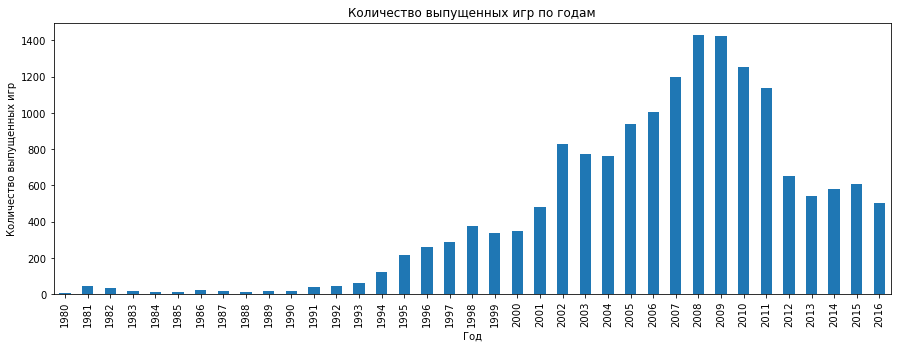

In [37]:
df_pivot_years.plot(y='name', 
                    kind='bar', 
                    figsize=(15, 5), 
                    title='Количество выпущенных игр по годам', 
                    xlabel='Год', ylabel='Количество выпущенных игр', 
                    legend=False)

plt.show()

Изучив график, мы можем сказать, что количество игр, выпущенных до 1991 г. было близким к нулю, а в 1991 г. оно начало постепенно возрастать. Наибольшее количество игр было выпущено в 2008 и 2009 г. 

В целом мы можем отметить, что наиболее важными данными являются данные за 1991-2016 гг., а данные до 1991 г. являются не очень значимыми из-за небольшого количества выпущенных в эти годы игр.

2) Посмотрим, как менялись продажи по платформам с течением времени. Выберем платформы с наибольшими суммарными продажами.

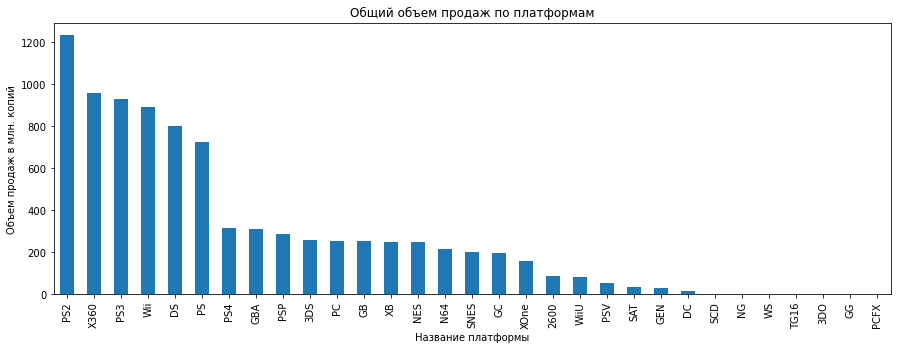

In [38]:
df_pivot_platforms = (df
                      .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                      .sort_values(by='total_sales', ascending=False)
                      .reset_index()
                     )

df_pivot_platforms.plot(x='platform', 
                        kind='bar', 
                        figsize=(15, 5), 
                        ylabel='Объем продаж в млн. копий', 
                        xlabel='Название платформы',
                        title='Общий объем продаж по платформам',
                        legend=False)

plt.show()

В качестве платформ с наибольшими суммарными продажами выберем первые шесть - PS2, X360, PS3, Wii, DS, PS.

Далее построим распределение продаж по годам по каждой из топ-6 платформ.

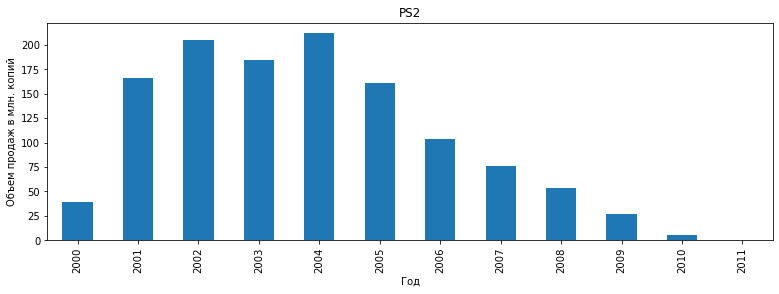

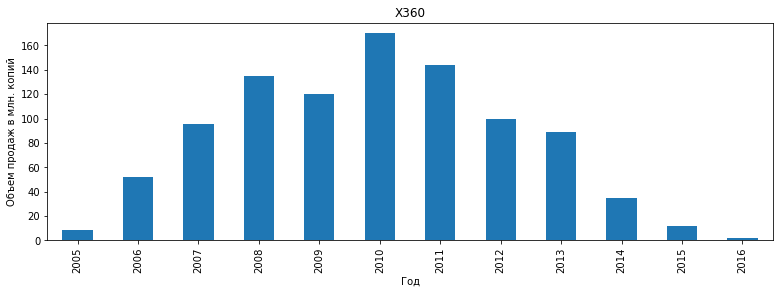

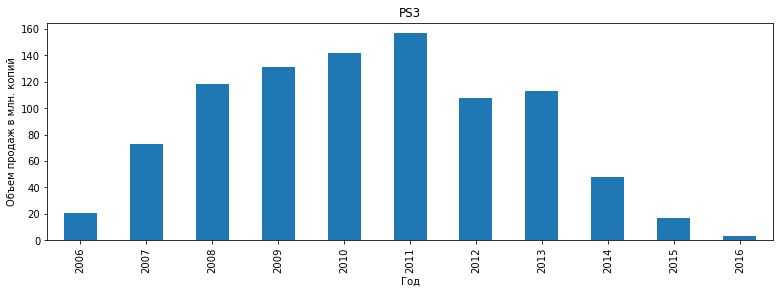

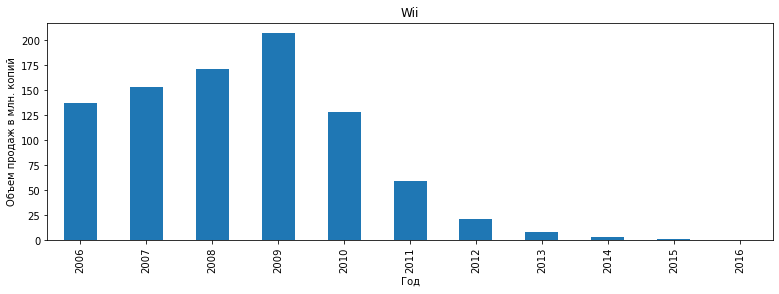

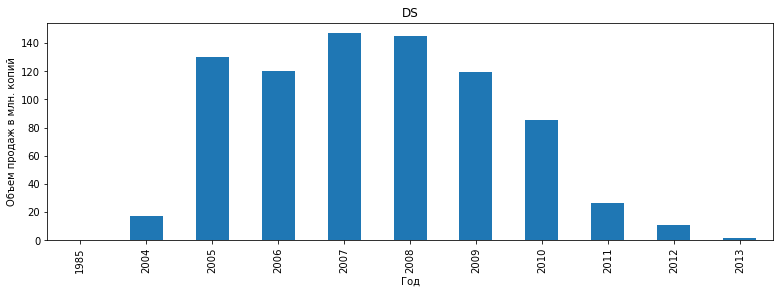

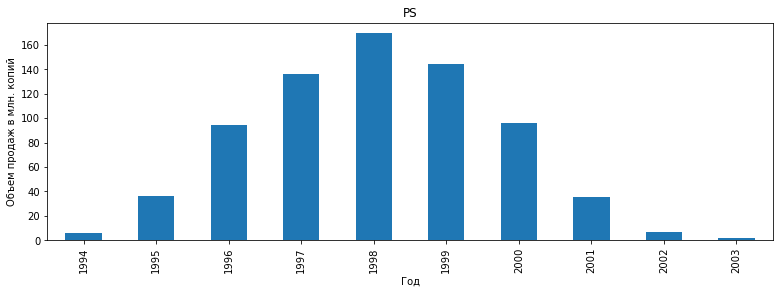

In [39]:
top_platforms_name = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

for platform_name in top_platforms_name:
    (df[df['platform'] == platform_name]
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(
         kind='bar', 
         figsize=(13, 4), 
         title=platform_name, 
         xlabel='Год', 
         ylabel='Объем продаж в млн. копий', 
         legend=False)
    )

Постров графики распределения продаж по годам, мы можем сказать, что в среднем платформы **живут** до **10 лет**. При этом продажи **растут** **первые 4-5 лет** после выпуска платформа, а **фаза активных продаж** составляет примерно **7 лет**.

Как правило, в первый год объемы продаж игр под конкретную платформу минимальны (за исключнием платформы Wii). 

**Пик продаж** приходится на **4-6 годы с момента выпуска** в зависимости от платформы. Вероятно это связано с увеличением количества доступных на платформе игр, т.к. к тому времени все больше и больше производителей успешно разрабатывают свои игры под особенности платформы, к тому же сама платформа становится со временем дешевле и все больше пользователей приобретают платформу и соответственно игры для нее.

На графике мы также видим странную особенность для распределения продаж по платформе DS. На графике отображается 1985 г., при этом основные объемы продаж начинаются только с 2004 г. Проверим, что это за игра.

In [40]:
df[(df['year_of_release'] == 1985) & (df['platform'] == 'DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_age_rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,999,999.0,undefined,0.02


Уточнив информацию в интернете, мы выяснили что платформа DS (Nintendo DS) была выпущена только в 2004, поэтому, вероятно, что 1985 г. был указан для этой игры по ошибке. Поэтому исключим данное наблюдение из датафрейма.

In [41]:
df = df.query('name != "Strongest Tokyo University Shogi DS"')

3) Определим актуальный для дальнейшего рассмотрения период.

На предыдущих этапах мы определили, что основной рост количества продаж игр на различные платофрмы приходится только на первые 4-5 лет после выхода новой платформы, поэтому платформы, которые находятся на пике популярности в 2016 г., вероятно начали расти примерно в 2012 гг., а те платформы, которые еще только набирают популярность, вероятно, вышли после 2012 г.

Также на графике распределения общих продаж по годам мы увидели, что после 2011 г. объем продаж примерно одинаково распределен по годам, в отличие от предыдущего периода. 

Кроме того, для планирования на 2017 г. нам важны данные именно за последние годы, т.к. предыдущие исторические данные могут привести не к самым актуальным выводам. Также мы знаем, что в имеющихся данных неполная информация за 2016 г. 

В связи со всеми этими факторами выделим актуальный период как годы с 2013 до 2015 г.

In [42]:
current_years = (2013, 2014, 2015)
df = df.query('year_of_release in @current_years')

### 3.2. Определение потенциально прибыльных платформ

Определим потенциально прибыльные платформы. Это те, которые на момент 2015 г. находятся в стадии роста и мы можем ожидать дальнейших прибылей от продажи игр на них. Для этого определим, какие платформы лидируют по продажам, растут и падают.

До этого мы выяснили 6 наиболее прибыльных платформ за все время, однако объемы продаж в 2016 г. по всем из них падают или уже достигли нулевого уровня, то есть данные платформы были популярны в прошлом, а сейчас уже неактуальны. Поэтому нам надо определить, какие платформы популярны сейчас и начали расти в выбранные нами актуальные годы - с 2013 по 2015.

In [43]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')

In [44]:
cmap = cm.get_cmap('tab20')

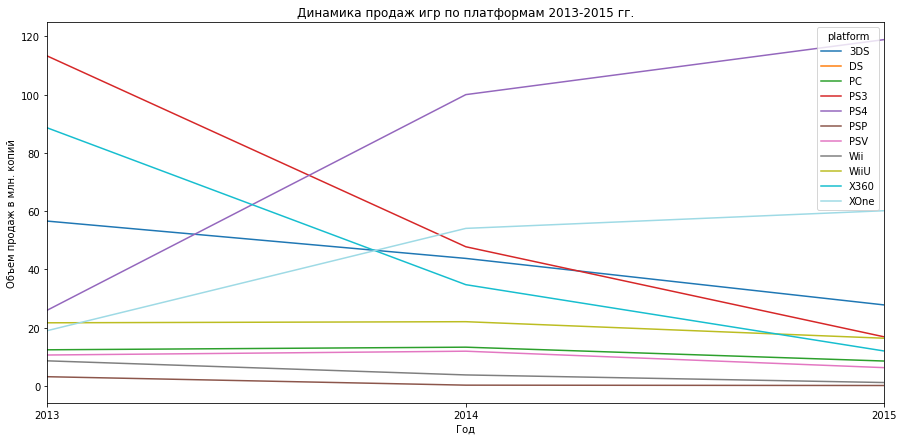

In [45]:
new_platforms_pivot = df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

new_platforms_pivot.plot(kind='line', 
                         figsize=(15, 7), 
                         title='Динамика продаж игр по платформам 2013-2015 гг.', 
                         xlabel='Год', 
                         ylabel='Объем продаж в млн. копий', 
                         colormap=cmap)

plt.show()

На графике получается довольно много линий продаж по платформам, однако становится ясно, что из всех активных в 2013-2015 гг. платформ растут PS4 и XOne, выпущенные в 2013 г.

Таким образом, мы видим, что на 2015 г. растут и при этом являются лидерами по продажам PS4 и XOne. Продажи игр на остальные платформы - PS3, 3DS, WiiU, X360, PC, PSV, Wii, PSP снижаются.

### 3.3. Глобальные продажи игр в разбивке по платформам

Далее рассмотрим распределние значений глобальных продаж игр в разбивке по актуальным платформам, построив диаграмму размаха.

Выберем только те платформы, которые находятся в стадии роста: PS4, Xbox One

In [46]:
growing_platforms = ('PS4', 'XOne')

Посмторим диаграмму размаха:

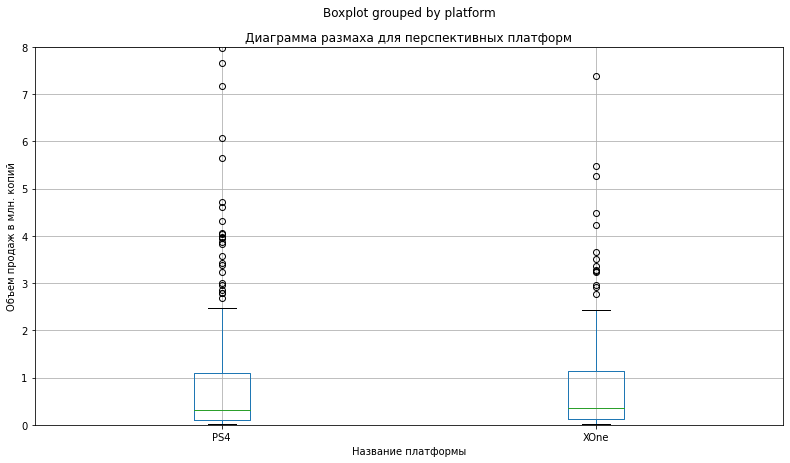

In [47]:
ax = (df
      .query('platform in @growing_platforms')
      .boxplot(column='total_sales', by='platform', figsize=(13, 7))
     )

plt.ylim(0, 8)

ax.set_title('Диаграмма размаха для перспективных платформ')
ax.set_xlabel('Название платформы')
ax.set_ylabel('Объем продаж в млн. копий')

plt.show()

Рассмотрим медианные и средние значения продаж игр по каждой платформе

In [48]:
for platform_name in growing_platforms:
    print('Медианное значение продаж игр на платформе', platform_name, '- {:.2f}'
          .format(df[df['platform'] == platform_name]['total_sales'].median()), 'млн. копий')
    print()
    print('Среднее значение продаж игр на платформе', platform_name, '- {:.2f}'
          .format(df[df['platform'] == platform_name]['total_sales'].mean()), 'млн. копий')
    print()

Медианное значение продаж игр на платформе PS4 - 0.31 млн. копий

Среднее значение продаж игр на платформе PS4 - 1.07 млн. копий

Медианное значение продаж игр на платформе XOne - 0.35 млн. копий

Среднее значение продаж игр на платформе XOne - 0.83 млн. копий



Изучив диаграммы размаха и медианы, мы можем отметить, что медианные значения продаж игр по платформам очень близки друг к другу (310 тыс. копий для PS4 и 350 тыс. копий для Xbox One). Также мы можем сказать что медина располагается близко к нижней границе "ящика", то есть 50% наблюдений по обеим платформам находится ниже 350 тыс. копий. А большая часть значений, как мы видим, лежит в диапазоне от примерно 0 до чуть больше 1 млн. копий. 

Также на графиках наблюдаются выбросы как по продажам на платформе PS4, так и на XOne, это игры с объем продаж гораздо большим, чем значение третьего квартиля. В связи с этим средние значения продаж по каждой платформе значительно больше медианных значений (более, чем в три раза больше для PS4 и более, чем в два раза больше для Xbox One). 

Таким образом, можно отметить, что разброс данных внутри "ящика" и "усов" у обеих платформ примерно одинаков, однако больше выбросов наблюдается у PS4.

### 3.4. Изучение влияния отзывов критиков и пользователей

Изучим, каким образом влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, построив для этого диаграмму рассеяния (по горизонтальной оси укажем рейтинг пользователей/критиков, по вертикальной оси - объем продаж).

Исключим из рассмотрения значения-маркеры, которые мы использовали для заполнения пропусков в столбцах с оценками критиков и пользователей.

In [49]:
df_for_ratings = df.query('user_score != 999 and critic_score != 999')

Для каждой платформы построим диаграмму рассеяния:

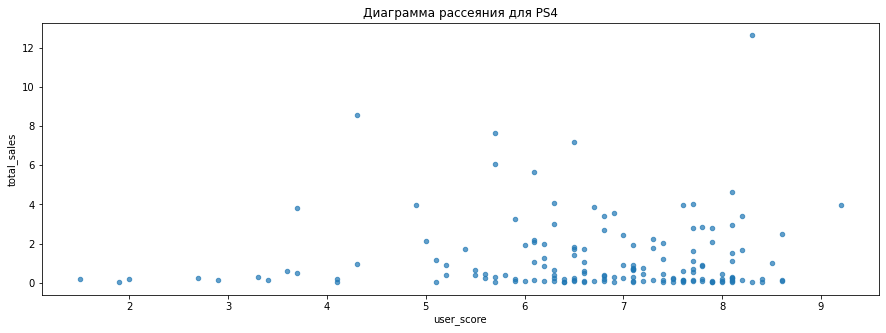

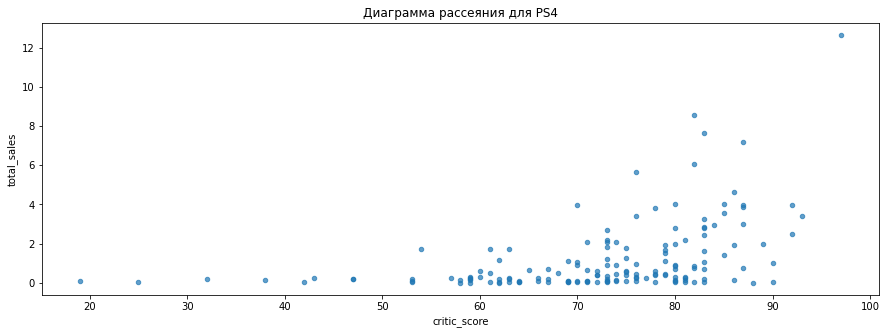

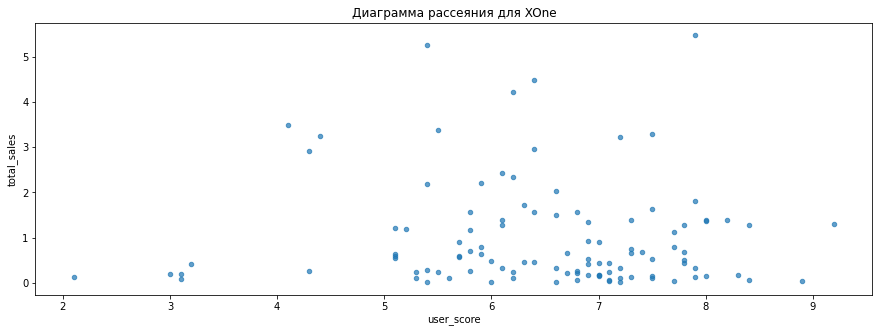

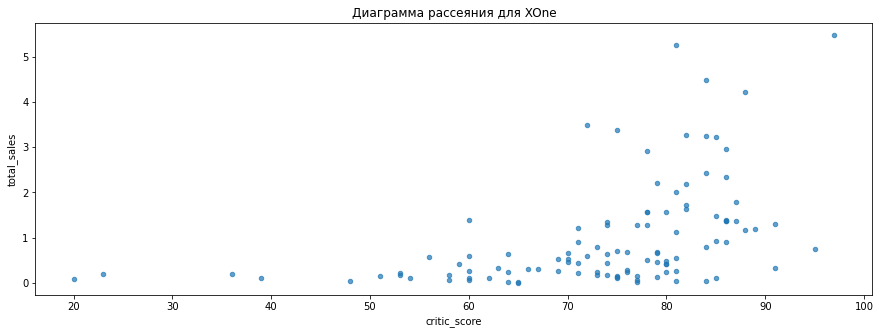

In [50]:
score_types = ('user_score', 'critic_score')

for platform_name in growing_platforms:
    for score_type in score_types:
        (df_for_ratings[df_for_ratings['platform'] == platform_name]
         .plot(x=score_type, 
               y='total_sales', 
               kind='scatter', 
               figsize=(15, 5),
               title='Диаграмма рассеяния для {}'.format(platform_name), 
               alpha=0.7)
        )
    

Изучив графики, мы видим, что для PS4 и для Xbox One рейтинг пользователей практически никак не влияет, большие продажи, есть у игр с высоким, и угр со средним рейтингом. Другая ситуация с оценками критиков. На графиках видно, что оценки критиков влияют на продажи игр - большие объем продаж есть у тех игр, которые высоко ценятся критиками (оценки от 70 и больше). Проверим данный вывод, посчитав корреляцию.

In [51]:
for platform_name in growing_platforms:
    for score_type in score_types:
        print('Коэффициент корреляции между', score_type, 'и объемом продаж на платформе', platform_name, '= {:.2f}'
              .format(df_for_ratings[df_for_ratings['platform'] == platform_name]['total_sales']
                      .corr(df_for_ratings[score_type])))

Коэффициент корреляции между user_score и объемом продаж на платформе PS4 = 0.02
Коэффициент корреляции между critic_score и объемом продаж на платформе PS4 = 0.43
Коэффициент корреляции между user_score и объемом продаж на платформе XOne = -0.05
Коэффициент корреляции между critic_score и объемом продаж на платформе XOne = 0.45


Данные о корреляции также демонстируют практически отсуствие связи между оценками пользователей и объемом продаж как на платформе PS4, так и на платформе XOne в 2012-2015 гг. При этом мы видим, что существует корреляция между отзывами критиков и объемами продаж игр, то есть для большого количества наблюдений, чем выше оценка игры критиками, тем больше объем продаж.

Сравним эти данные о зависимостях с продажами игр на других платформах.

In [52]:
df_other_platforms = df_for_ratings.query('platform not in @growing_platforms')

for score_type in score_types:
    print('Коэффициент корреляции между', score_type, 'и объемом продаж на других платформах = {:.2f}'
          .format(df_other_platforms['total_sales'].corr(df_other_platforms[score_type])))

Коэффициент корреляции между user_score и объемом продаж на других платформах = 0.03
Коэффициент корреляции между critic_score и объемом продаж на других платформах = 0.27


Посчитав коэффициенты корреляции для остальных платформ, мы также видим, что нет практически никакой связи между рейтингом пользователей и объемом продаж в выбранные нами 2012-2015 гг. Однако, как и в случае с платформами PS4 и XOne, есть связь между рейтингом критиков и объемом продаж, однако эта связь не такая сильная, как для рассмотренных нами ранее растущих платформ.

### 3.5. Определение самых прибыльных жанров

Посмотрим на средние объемы продаж игр по жанрам и определим самые прибыльные.

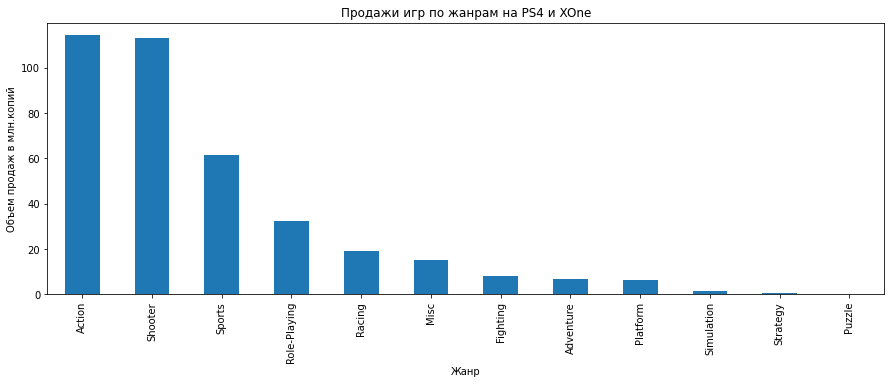

In [53]:
(df
 .query('platform in @growing_platforms')
 .pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .sort_values(by='total_sales', ascending=False)
 .plot(kind='bar', 
       title='Продажи игр по жанрам на PS4 и XOne',
       xlabel = 'Жанр',
       ylabel='Объем продаж в млн.копий', 
       figsize=(15, 5), 
       legend=False)
)

plt.show()

Изучив график, мы можем сказать, что примерно на одном уровне по прибыльности находятся игры в жанрах action и shooter. Далее идет жанр sports со значительной разницей в продажах по сравнению с наиболее прибыльными жанрами.

А три наименее прибыльных жанра - это simulation, strategy и puzzle.

### Вывод

На данном шаге мы

1) Изучили распределение выпущенных игр по годам и выяснили, что **до 1991 г.** количество выпущенных игр было очень небольшим, близким к нулю. **После 1991 г.** оно начало постепенно расти и достигло своего пика в **2008-2009 гг.** (почти 1400 выпущенных игр в каждый из этих годов), после чего начало понемногу уменьшаться. **После 2011 г.** мы можем наблюдать резкое снижение количества выпущенных игр; примерно одинаковый уровень количества вышедших игр сохраняется в **2012-2016 гг.**

2) Рассмотрели общие объемы продаж по платформам и выбрали топ-6 платформ, принесших наибольшую выручку с 1991 по 2016 гг., и изучили срок активных продаж игр на данные платформы. Мы сделали вывод о том, что срок жизни платформ составляет примерно 10 лет, при этом **пик приходится на 4-5 г.** после выхода платформа, а активные продажи составляют примерно 7 лет.

3) Определелили актуальный период для дальнейшего исследования - **2013 до 2015 гг.** Данный промежуток был выбран в связи с тем, что количество выпущенных игр в эти годы примерно равномерно распределено по годам, нет резких перепадов, кроме того в этот период начинают расти перспективные в настоящее время платформы. Данные за 2016 г. не были учтены, так как на момент выгрузки данных они были неполные.

4) Выделили растущие платформы, то есть те, на 2015 г. продажи растут. Это **Xbox One, PS4**. Кроме того, это и самые прибыльные за 2014-2015 г. платформы.

5) Изучили разброс данных по продажам на растущие платформы и сделали вывод о том, что **разброс** данных у них примерно **одинаков**, но у PS4 наблюдается больше выбросов.

6) Изучили зависимость объема продаж от оценок критиков и пользователей: продажи на растущих платформах (PS4, XOne) не зависят от оценок пользователей, но наблюдается довольно сильная **связь между продажами и рейтингом критиков**. Похожая ситуация и с остальными платформами, но связь между продажами и оценками критиков на них более слабая.

7) Определили самые прибыльные жанры, это оказались игры **экшн, шутеры, спортивные**, а наименее популярные и соответственно прибыльные - это симуляции, стратегии и пазлы.

## 4. Составление портрета пользователей по регионам <a id="4"></a>

### 4.1. Самые популярные платформы по регионам
Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5):

In [54]:
for region_sales in ['na_sales', 'eu_sales', 'jp_sales']:
    sum_of_region_sales = df[region_sales].sum()
    temp = (df
          .pivot_table(index='platform', values=region_sales, aggfunc='sum')
          .sort_values(by=region_sales, ascending=False)
          .head(5))
    temp['share'] = (temp[region_sales]/sum_of_region_sales).map('{:.1%}'.format)
    display(temp)

,na_sales,share
platform,,
PS4,87.25,22.2%
X360,80.97,20.6%
XOne,78.85,20.1%
PS3,62.83,16.0%
3DS,34.06,8.7%


,eu_sales,share
platform,,
PS4,109.31,32.1%
PS3,66.55,19.5%
XOne,41.96,12.3%
X360,41.81,12.3%
3DS,28.63,8.4%


,jp_sales,share
platform,,
3DS,59.78,49.2%
PS3,22.05,18.2%
PSV,15.03,12.4%
PS4,10.22,8.4%
WiiU,10.21,8.4%


Мы видим, что за 2013-2015 гг. наиболее популярные платформы 
* в Северной Америке - X360, PS3, PS4, XOne, 3DS
* в Европе - PS4, PS3, X360, XOne, 3DS
* в Японии - 3DS, PS3, PSV, WiiU, PSP

Таким образом, мы можем сказать что самые популярные платформы различаются по регионам - X360 является наиболее популярной в Северной Америке, на третьем месте по популярности в Европе и не входит в топ платформ в Японии. 

Также мы можем отметить, что в Европе и Северной Америки состав популярных платформ одинаков (но расположение их в топе различается), но он значительно отличается от Японии, где популярны платформы PSV, WiiU, PSP, которые не входят в топ в других регионах, а наиболее популярной является платформа 3DS, которая находится только на 5 месте в NA и EU. Вероятно, 3DS является самой популярной в Японии, т.к. была произведена в этой стране.

Также изучив доли по продажам мы можем сказать, что в Европе доля продаж игр на топ-1 и топ-2 (PS4 и PS3) платформы примерно одинаковы, в Северной Америке доля продаж игр на первую по популярности платформу (X360) почти на 7% больше, чем на вторую по популярности (PS3), а в Японии продажи игр на самую популярную платформу (3DS) более, чем в два раза превышают продажи на платформу топ-2 (PS3).

### 4.2. Самые популярные жанры по регионам

Также определим самые популярные жанры (топ-5) по регионам.

In [55]:
for region_sales in ['na_sales', 'eu_sales', 'jp_sales']:
    sum_of_region_sales = df[region_sales].sum()
    temp = (df
          .pivot_table(index='genre', values=region_sales, aggfunc='sum')
          .sort_values(by=region_sales, ascending=False)
          .head(5)
         )
    temp['share'] = (temp[region_sales]/sum_of_region_sales).map('{:.1%}'.format)
    display(temp)

,na_sales,share
genre,,
Action,116.76,29.7%
Shooter,93.50,23.8%
Sports,57.73,14.7%
Role-Playing,40.51,10.3%
Misc,26.73,6.8%


,eu_sales,share
genre,,
Action,107.45,31.5%
Shooter,71.96,21.1%
Sports,48.51,14.2%
Role-Playing,32.69,9.6%
Misc,19.38,5.7%


,jp_sales,share
genre,,
Role-Playing,44.43,36.6%
Action,33.42,27.5%
Misc,8.16,6.7%
Fighting,6.90,5.7%
Shooter,5.55,4.6%


За 2013-2015 гг. наиболее популярные жанры:
* В Северной Америке - action, shooter, sports, role-playing, misc
* В Европе - action, shooter, sports, role-playing, misc
* В Японии - role-playing, action, misc, simulation, fighting

Таким образом, как и в случае с платформами, состав наиболее популярных жанров одинаков в Европе и Северной Америке (топ-5 популярных жанров - экшн, шутеры, спорт, ролевые игры и misc**) и значительно отличается от Японии, где в числе наиболее популярных игр, помимо тех, что популярны в EU и NA, есть симуляции и бои, которые не входят в топ в других регионах.

** misc - игры в категории skill-and-action 

Рассмотрим, почему самые популярные жанры в Японии различаются от других регионов: изучим, какие 10 игр являются самыми продаваемыми в этой стране.

In [56]:
(df
 .pivot_table(index=('name', 'genre', 'platform'), values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False)
 .head(10)
)

,,,jp_sales
name,genre,platform,
Pokemon X/Pokemon Y,Role-Playing,3DS,4.35
Monster Hunter 4,Role-Playing,3DS,3.44
Yokai Watch 2 Ganso/Honke,Role-Playing,3DS,3.18
Pokemon Omega Ruby/Pokemon Alpha Sapphire,Role-Playing,3DS,3.10
Monster Hunter X,Action,3DS,2.79
Yokai Watch 2 Shinuchi,Role-Playing,3DS,2.68
Monster Hunter 4 Ultimate,Role-Playing,3DS,2.62
Super Smash Bros. for Wii U and 3DS,Fighting,3DS,2.43
Yokai Watch Busters,Action,3DS,2.29


Мы видим, что наиболее продаваемые игры в Японии в жанре ролевых игр - Animal Crossing, Pokemon, Monster Hunter, Yokai Watch и т.д. - игры, разработанные в Японии и, вероятно, учитывающие японский менталитет, поэтому они популярны у себя на родине. Кроме того, большинство, игр выпускаются на платформе 3DS, самой популярной в Японии. Можно предположить, что эти игры популярны, потому что популярна платформа Nintendo или, наоборот, Nintendo популярно, потому что жители Японии хотят поиграть в игры, которые выпускаются на данной платформе. Мне кажется наиболее вероятным второй вариант, т.к. если бы такие популярные у японцев игры не выпускались на Nintendo, то и платформа была бы не такой популярной.

### 4.3. Определение влияния рейтинга ESRB на продажи по регионам.

Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [57]:
for region_sales in ['na_sales', 'eu_sales', 'jp_sales']:
    sum_of_region_sales = df[region_sales].sum()
    temp = (df
          .query('esrb_age_rating != "undefined"')
          .pivot_table(index='esrb_age_rating', values=region_sales, aggfunc='sum')
          .sort_values(by=region_sales, ascending=False)
         )
    temp['share'] = (temp[region_sales]/sum_of_region_sales).map('{:.1%}'.format)
    display(temp)

,na_sales,share
esrb_age_rating,,
M,149.54,38.1%
E,71.08,18.1%
E10+,50.43,12.8%
T,40.84,10.4%


,eu_sales,share
esrb_age_rating,,
M,128.78,37.8%
E,69.75,20.5%
E10+,38.88,11.4%
T,32.16,9.4%


,jp_sales,share
esrb_age_rating,,
T,18.32,15.1%
E,14.07,11.6%
M,12.91,10.6%
E10+,5.44,4.5%


Наибольший объем продаж в Северной Америке и Европе у игр в категории M - mature, затем идут игры в категории E - everyone, E10+ - everyone 10 and older и T - teen. В Японии же другая ситуация - наиболее хорошо продаваемы игры в категории E - everyone, затем T - teen, только после них M - mature и E10+ - everyone 10 and older.

Возможно, основные пользователи игр в Японии - молодые жители страны, поэтому и наиболее продаваемы игры с рейтингом E и T, однако проверка данного предположения требует дополнительной информации о возрасте игроков.


### Вывод

На данном этапе мы выяснили, что топ самых популярных платформ и жанров примерно одинаков в Европе и Америке, но значительно отличается от Японии. Самая популярная платформа в Японии - Nintendo 3DS, а самый популярный жанр - Role-Playing, в отличие от Северной Америки и Европы, где самая популярная платформа - X360 и PS4 соответственно, а самый популярный жанр - Action. Изучив самые продаваемые в Японии игры и прочитав о них информацию в интернете, мы выяснили, что это игры, разработанные в самой Японии, возможно этим и обсулавливается их популярность и популярность Nintendo, на которой они выпускаются.

Также мы изучили продажи игр в зависимости от возрастного рейтинга. Здесь также ситуация в Северной Америке и Европе, где наиболее продаваемы игры рейтинга M и E (mature, everyone), значительно отличается от Японии, в которой наибольшая доля продаж у игр с рейтингом E и T (everyone, teen).

## 6. Общий вывод <a id="6"></a>

Таким образом, мы изучили данные по продажам игр на различных платформах с 1991 по 2016 гг., но в ходе работы ограничили рассматриваемый период до 2013-2015 гг., поэтому последующие выводы сделаны на основе данных за указанный промежуток времени.

В ходе исследования мы сделали основные выводы, которые будут полезны для планирования рекламных кампаний в 2017 г.

1) Наиболее прибыльными и растущими платформами на момент исследования являются платформы Xbox One и PS4

2) Наблюдается положительная корреляция между оценками игр критиками и продажами игр, то есть, чем выше оценки игры критиками, тем вероятнее у игры будут большие продажи

3) Наиболее прибыльными жанрами за последние несколько лет являются игры в жанрах action, shooter, sport

4) Продажи игр значительно различаются по регионам: в Северной Америке и Европе наиболее популярны игры в жанрах action, shooter, sport, а в Японии - role-playing и action. Также в Японии наибольшие продажи за последние годы приходятся на платформу Nintendo 3DS, в отличие от Северной Америки и Европы.